In [36]:
import requests

url = "https://overfast-api.tekrop.fr/players/WhoisKA-2138/stats/summary?gamemode=quickplay&platform=pc"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

{'general': {'games_played': 460, 'games_won': 255, 'games_lost': 205, 'time_played': 211928, 'winrate': 55.43, 'kda': 2.83, 'total': {'eliminations': 6153, 'assists': 639, 'deaths': 2399, 'damage': 2946179, 'healing': 498341}, 'average': {'eliminations': 17.42, 'assists': 1.81, 'deaths': 6.79, 'damage': 8341.08, 'healing': 1410.88}}, 'roles': {'damage': {'games_played': 334, 'games_won': 183, 'games_lost': 151, 'time_played': 153688, 'winrate': 54.79, 'kda': 2.61, 'total': {'eliminations': 4569, 'assists': 211, 'deaths': 1833, 'damage': 2365623, 'healing': 27711}, 'average': {'eliminations': 17.84, 'assists': 0.82, 'deaths': 7.16, 'damage': 9235.42, 'healing': 108.18}}, 'support': {'games_played': 92, 'games_won': 51, 'games_lost': 41, 'time_played': 42908, 'winrate': 55.43, 'kda': 3.55, 'total': {'eliminations': 1065, 'assists': 416, 'deaths': 417, 'damage': 367804, 'healing': 470630}, 'average': {'eliminations': 14.89, 'assists': 5.82, 'deaths': 5.83, 'damage': 5143.15, 'healing': 6

In [ ]:
import json
json_dict = json.loads(response.text)
json_dict['heroes']

In [ ]:
import json
json_dict = json.loads(response.text)
heroes_dict = json_dict['heroes']
heroes_dict["ana"]

In [ ]:
import pandas as pd
heroes_list = list(heroes_dict.keys())
column_names = ["games_played", "games_won", "games_lost", "time_played", "winrate", "kda"]
sub_column_names = ["elimination", "assists", "deaths", "damage", "healing"]

column_dict = {"heroes": heroes_list}
for hero in heroes_list:
  for column in column_names:
    val = heroes_dict[hero][column]
    if column not in column_dict:
      column_dict[column] = [val]
    else:
      column_dict[column].append(val)

for hero in heroes_list:
  for column in heroes_dict[hero]["total"]:
    val = heroes_dict[hero]["total"][column]
    if f"total_{column}" not in column_dict:
      column_dict[f"total_{column}"] = [val]
    else:
      column_dict[f"total_{column}"].append(val)

for hero in heroes_list:
  for column in heroes_dict[hero]["average"]:
    val = heroes_dict[hero]["average"][column]
    if f"average_{column}" not in column_dict:
      column_dict[f"average_{column}"] = [val]
    else:
      column_dict[f"average_{column}"].append(val)
column_dict

In [ ]:
import pandas as pd

df = pd.DataFrame(column_dict)
df_wo_hero_names = df.drop(["heroes"], axis=1)
df

In [ ]:

print(df.info())

In [42]:
summary = df.describe()
# Display the summary
print(summary)


       games_played  games_won  games_lost   time_played     winrate  \
count     35.000000  35.000000   35.000000     35.000000   35.000000   
mean      13.142857   7.285714    5.857143   6055.085714   53.131429   
std       16.101046   9.426407    6.945768   6982.503303   25.037024   
min        0.000000   0.000000    0.000000    155.000000    0.000000   
25%        4.000000   2.000000    2.000000   1849.500000   43.650000   
50%        8.000000   4.000000    4.000000   3674.000000   51.670000   
75%       17.000000   8.500000    7.500000   7710.000000   61.250000   
max       74.000000  44.000000   30.000000  29585.000000  100.000000   

             kda  total_eliminations  total_assists  total_deaths  \
count  35.000000           35.000000      35.000000     35.000000   
mean    3.205429          175.800000      18.257143     68.542857   
std     2.092605          195.864869      47.552660     88.136039   
min     0.330000            1.000000       0.000000      2.000000   
25%   

In [ ]:
# Basic statistics about the DataFrame
print(df.describe())


print(df.info())

# Check for missing values
print(df.isnull().sum())


In [49]:
high_winrate_heroes = df[df['winrate'] > 50]
print(high_winrate_heroes[["heroes","winrate"]])

          heroes  winrate
3        bastion    52.94
6            dva    66.67
8           echo    58.82
9          genji    59.46
10         hanzo    51.67
11        illari   100.00
12  junker-queen   100.00
15    lifeweaver    60.00
16         lucio   100.00
17           mei    60.00
20      ramattra    80.00
21        reaper    55.56
24         sigma   100.00
25       sojourn    57.14
26    soldier-76    68.97
28      symmetra    62.50
30        tracer    60.00
34      zenyatta    65.71


In [45]:
top8_heroes = df.nlargest(8, 'games_played')

# Display the filtered DataFrame
print(top8_heroes[["heroes","games_played"]])

        heroes  games_played
9        genji            74
10       hanzo            60
34    zenyatta            35
17         mei            30
26  soldier-76            29
5      cassidy            20
27      sombra            18
0          ana            17


In [46]:
selected_columns = ['heroes', 'time_played', 'kda']
filtered_data = df[selected_columns]
print(filtered_data)

          heroes  time_played    kda
0            ana         8444   3.22
1           ashe         1304   1.93
2       baptiste          239   4.00
3        bastion         6615   2.89
4       brigitte         3674   3.34
5        cassidy         9891   2.96
6            dva         3228   4.29
7       doomfist         1645   5.09
8           echo         9293   3.20
9          genji        29585   1.85
10         hanzo        27060   2.17
11        illari          575   6.33
12  junker-queen         2235   7.87
13       junkrat         5443   2.33
14        kiriko         5544   3.44
15    lifeweaver         2470   1.12
16         lucio          477   1.60
17           mei        14586   4.53
18         moira         5151   5.03
19        pharah         1809   0.88
20      ramattra         1890  10.90
21        reaper         4019   2.26
22     reinhardt         2968   1.44
23       roadhog         2236   1.83
24         sigma          549   3.00
25       sojourn         2718   2.97
2

In [47]:
top_n = 10
top_heroes = df.nlargest(top_n, 'kda')
print(top_heroes[['heroes', 'kda']])


          heroes    kda
20      ramattra  10.90
12  junker-queen   7.87
11        illari   6.33
7       doomfist   5.09
18         moira   5.03
27        sombra   4.65
17           mei   4.53
6            dva   4.29
2       baptiste   4.00
34      zenyatta   3.80


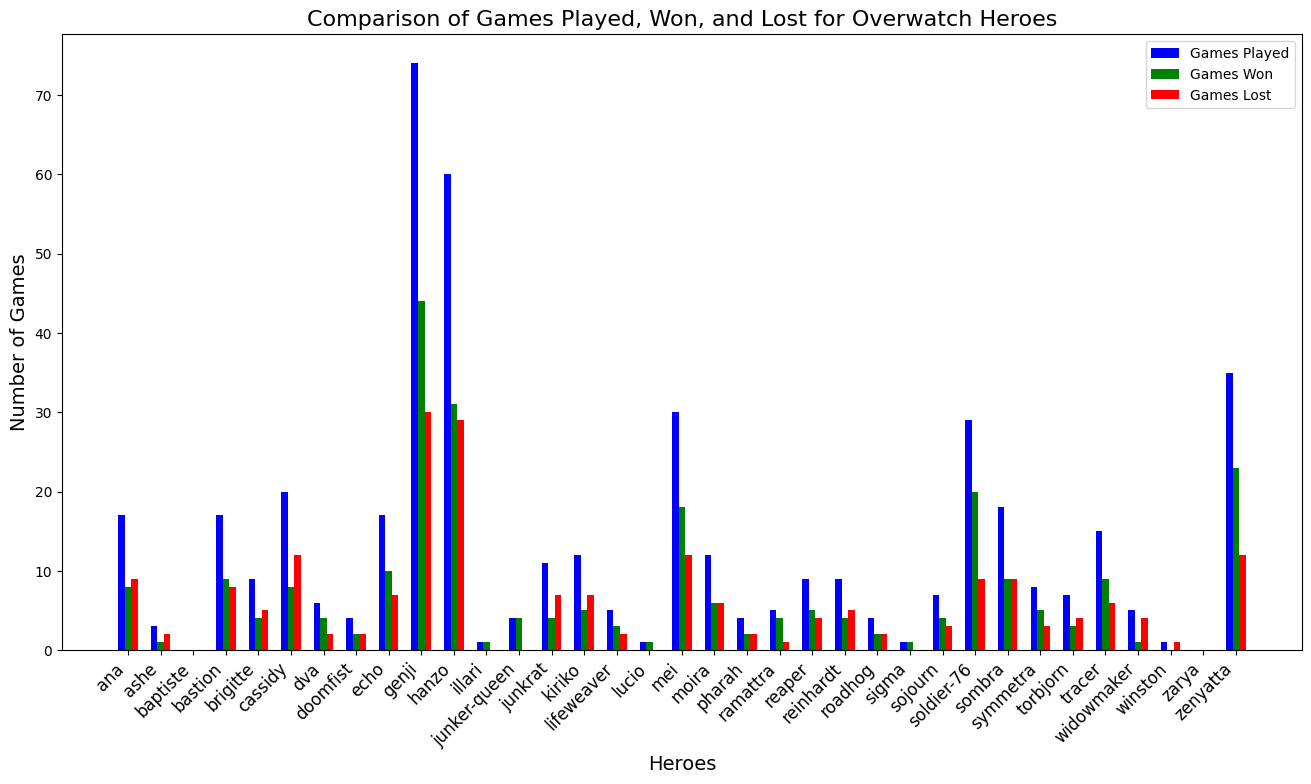

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics for each hero
heroes = df['heroes']
games_played = df['games_played']
games_won = df['games_won']
games_lost = df['games_lost']

# Set up positions for the bars
bar_width = 0.2
index = np.arange(len(heroes))

# Create grouped bar plot with color variation
plt.figure(figsize=(16, 8))
plt.bar(index - bar_width, games_played, bar_width, label='Games Played', color='blue')
plt.bar(index, games_won, bar_width, label='Games Won', color='green')
plt.bar(index + bar_width, games_lost, bar_width, label='Games Lost', color='red')

# Add labels and title
plt.title('Comparison of Games Played, Won, and Lost for Overwatch Heroes', fontsize=16)
plt.xlabel('Heroes', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.xticks(index, heroes, rotation=45, ha='right', fontsize=12)
plt.legend()

plt.show()


In [54]:
from sklearn.cluster import KMeans
df_w_predictions = df.copy()
model = KMeans(n_clusters=5, random_state=42)
df_w_predictions["cluster"] = model.fit_predict(df_wo_hero_names)
df_w_predictions[["heroes", "cluster"]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,heroes,cluster
0,ana,4
1,ashe,0
2,baptiste,0
3,bastion,3
4,brigitte,0
5,cassidy,3
6,dva,0
7,doomfist,0
8,echo,3
9,genji,1


In [52]:
%%capture
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


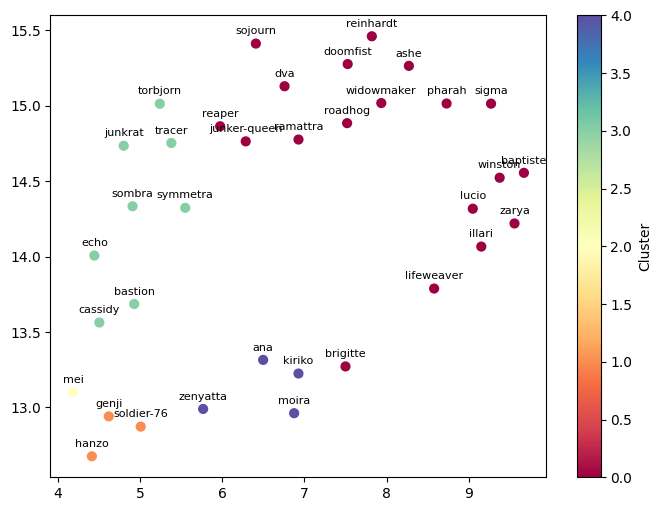

In [53]:
# Visualization
import umap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

standard_embedding = umap.UMAP(random_state=42).fit_transform(df_wo_hero_names)
scatter = plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=df_w_predictions.cluster.astype(int), s=40, cmap='Spectral');
for i, txt in enumerate(df_w_predictions['heroes']):
    plt.text(standard_embedding[i, 0], standard_embedding[i, 1]+0.05, txt, fontsize=8, ha='center', va='bottom')

# Add colorbar for better understanding of the clusters
plt.colorbar(scatter, label='Cluster')
plt.show()

In [56]:
import pandas as pd
from scipy.stats import pearsonr

data = df[['time_played', 'kda']]

In [57]:
correlation, _ = pearsonr(data['time_played'], data['kda'])
print(f'Correlation: {correlation}')

Correlation: -0.06666946377236559


In [58]:
# Perform the Pearson correlation test
stat, p_value = pearsonr(data['time_played'], data['kda'])


alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant positive correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant positive correlation.")


Fail to reject the null hypothesis: There is no significant positive correlation.


<ipython-input-59-37b433fbfbe6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='kda', y='heroes', data=df, orient='h', palette=color_palette, width=0.7, inner='quartile')
<ipython-input-59-37b433fbfbe6>:12: UserWarning: 
The palette list has fewer values (6) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='kda', y='heroes', data=df, orient='h', palette=color_palette, width=0.7, inner='quartile')


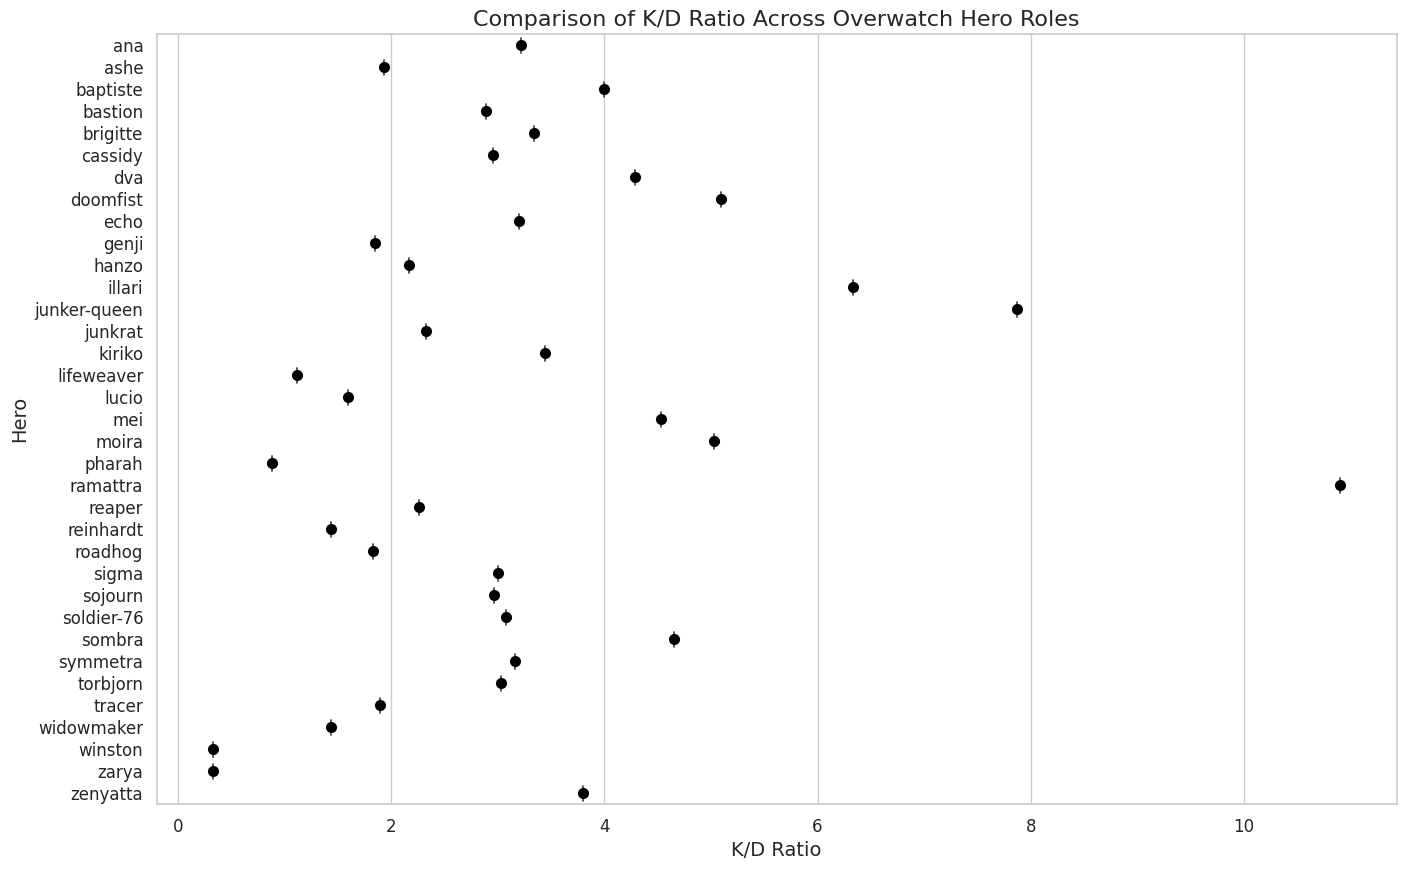

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


color_palette = sns.color_palette('husl')


sns.set(style="whitegrid")

# Create a violin plot with swarm points and a larger size
plt.figure(figsize=(16, 10))
sns.violinplot(x='kda', y='heroes', data=df, orient='h', palette=color_palette, width=0.7, inner='quartile')
sns.swarmplot(x='kda', y='heroes', data=df, orient='h', color='black', size=8)


plt.title('Comparison of K/D Ratio Across Overwatch Hero Roles', fontsize=16)
plt.xlabel('K/D Ratio', fontsize=14)
plt.ylabel('Hero', fontsize=14)

# Adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



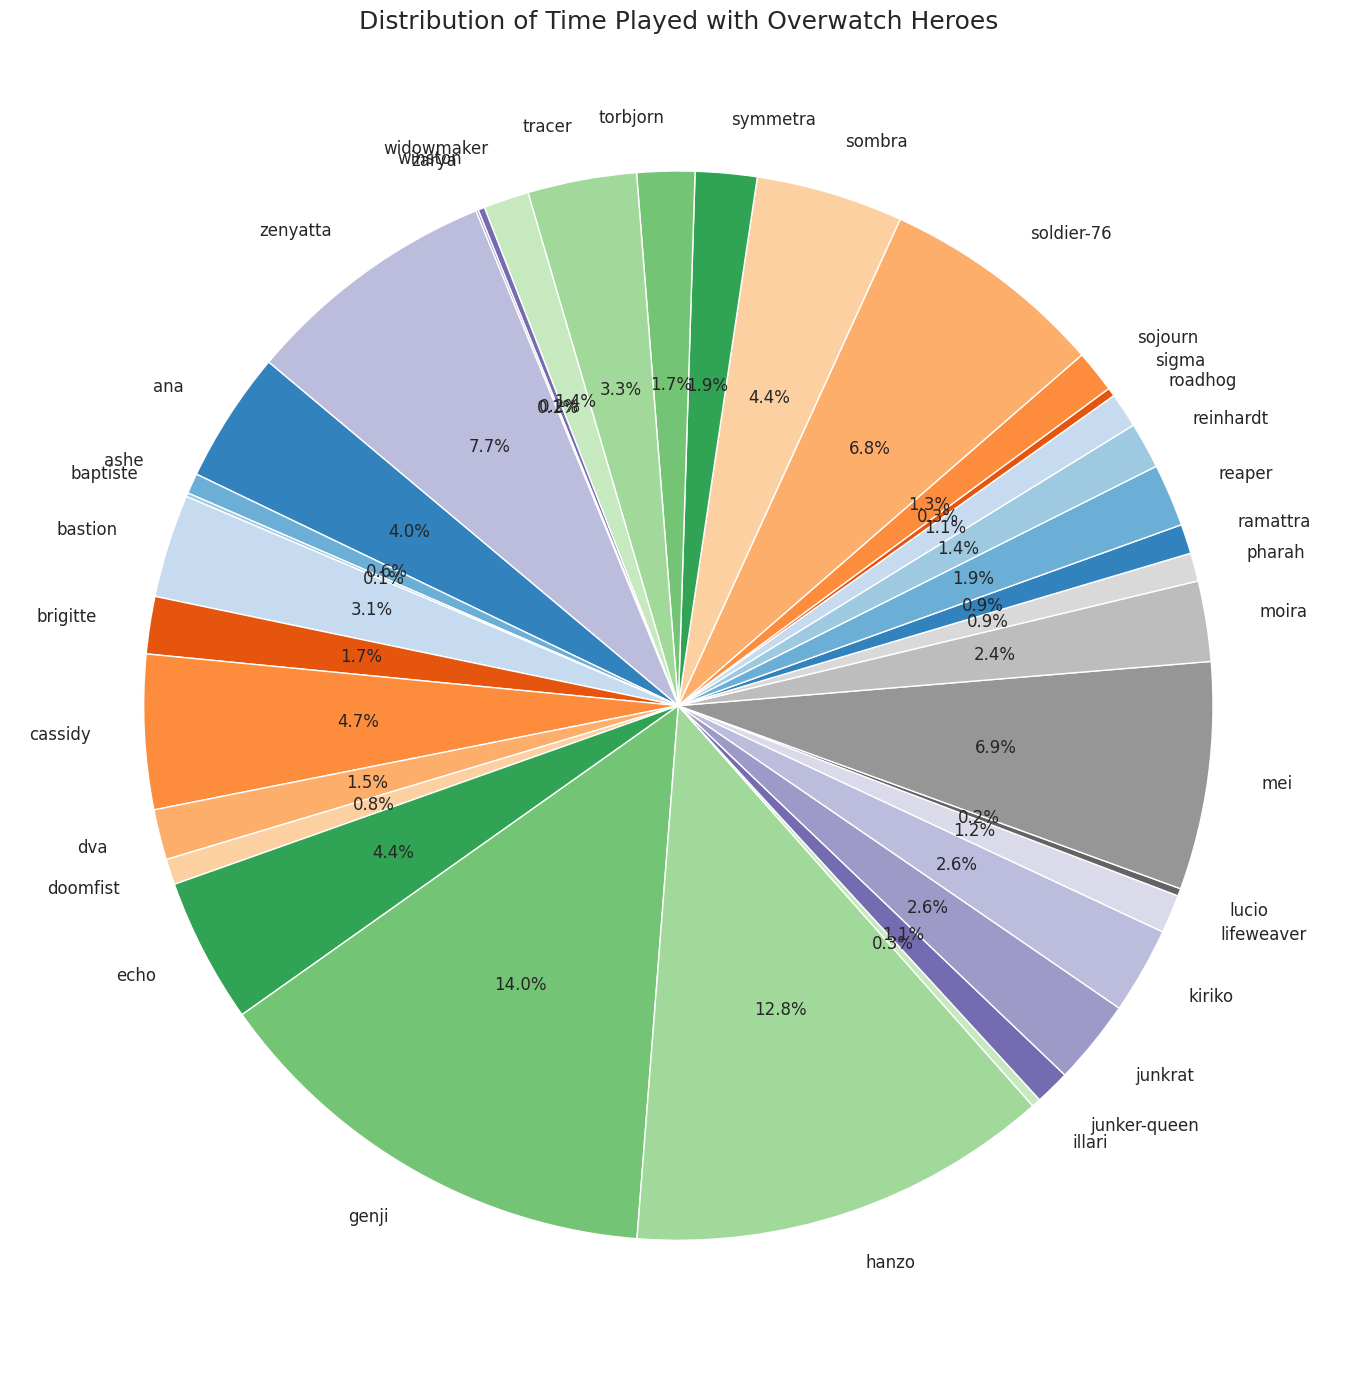

In [60]:
import matplotlib.pyplot as plt

time_played = df['time_played']
heroes = df['heroes']

# Create a larger and more readable pie chart
plt.figure(figsize=(14, 14))
plt.pie(time_played, labels=heroes, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors, textprops={'fontsize': 12})
plt.title('Distribution of Time Played with Overwatch Heroes', fontsize=18)


plt.tight_layout()

plt.show()


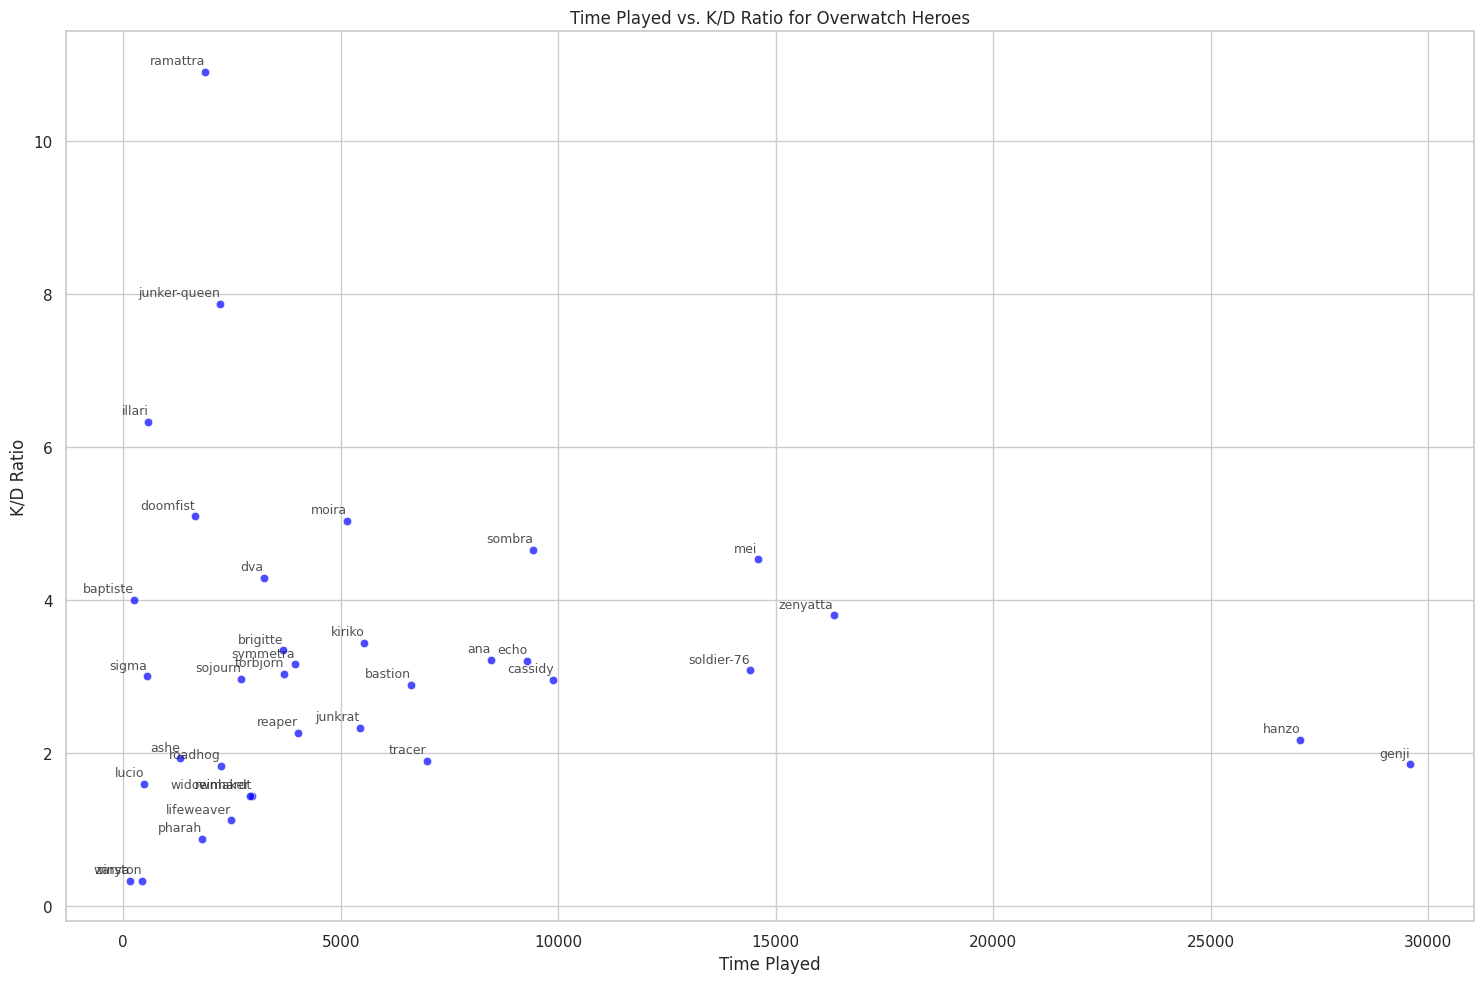

In [61]:
import matplotlib.pyplot as plt

# Scatter plot of time played vs. K/D ratio
plt.figure(figsize=(15, 10))
plt.scatter(df['time_played'], df['kda'], c='blue', alpha=0.7, edgecolors='w', linewidth=0.5)


plt.title('Time Played vs. K/D Ratio for Overwatch Heroes')
plt.xlabel('Time Played')
plt.ylabel('K/D Ratio')


for i, hero in enumerate(df['heroes']):
    plt.annotate(hero, (df['time_played'][i], df['kda'][i] + 0.1), fontsize=9, alpha=0.8, rotation=0, ha='right')

plt.tight_layout()
plt.show()
